### Libraries used

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random as rd
from scipy.integrate import quad

### Functions and constants

In [62]:
global alpha, T, m, n, H, Q, Z
n = 15
H = n*n
alpha = 0
T = 0
m = 0.5
Z = 1 #(?)

In [3]:
def utility_function_per_block(pho):
    if(pho <= 0.5):
        res = 2*pho
    else:
        res = 2*(m-1)*pho + (2 - m)
    return res

In [4]:
def entropy_per_block(pho):
    res = -pho*np.log(pho) - (1-pho)*np.log((1-pho))
    return res

In [5]:
def link_function_per_block(pho):
    a = 0
    b = pho
    I = quad(utility_function_per_block, a, b)
    return I[0]

In [6]:
def thermodynamic_potential_F_per_block(pho):
    res = -T*pho*np.log(pho) - T*(1-pho)*np.log((1-pho)) + alpha*pho*utility_function_per_block(pho) + (1-alpha)*link_function_per_block(pho)
    return res

In [7]:
def utility_function_global(pho_array):
    summation = 0
    for pho in pho_array:
        summation += pho * utility_function_per_block(pho)
    summation *= H
    return summation

In [8]:
def link_function_global(pho_array):
    summation = 0
    for pho in pho_array:
        summation += link_function_per_block(pho)
    summation *= H
    return summation

In [9]:
def thermodynamic_potential_F(pho_array):
    summation = 0
    for pho in pho_array:
        summation += thermodynamic_potential_F_per_block(pho)
    summation *= H
    return summation

In [10]:
# not useful because the results are too large
def probability_function(pho_array):
    res = 1/Z * np.exp(1/T * thermodynamic_potential_F(pho_array))
    return res

In [56]:
"""def partition_function(pho_array):
    summation = 0
    for pho in pho_array:
        summation += np.exp( 1/T * thermodynamic_potential_F(pho))

SyntaxError: incomplete input (3690124766.py, line 1)

### Analysis

#### Utility per block

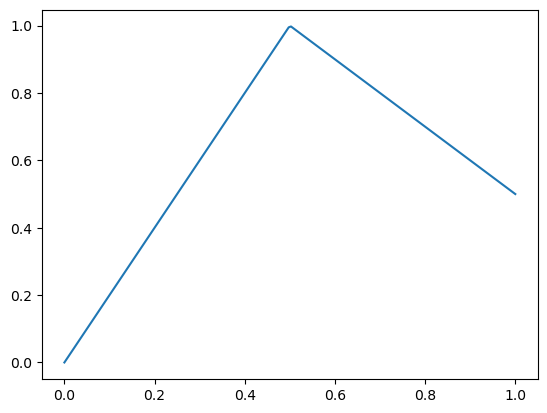

In [11]:
epsilon = 0
pho_min = 0 + epsilon
pho_max = 1 - epsilon
steps = 200
phos = np.linspace(pho_min,pho_max,steps,endpoint=True)
utility = np.zeros(steps)
for i in range(steps):
    utility[i] = utility_function_per_block(phos[i])

plt.figure()
plt.plot(phos,utility)
plt.show()

#### Entropy per block

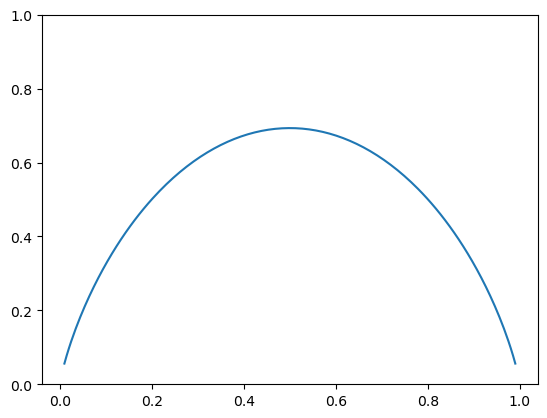

In [12]:
epsilon = 0.01
pho_min = 0 + epsilon
pho_max = 1 - epsilon
phos = np.linspace(pho_min,pho_max,200,endpoint=True)
entropys = entropy_per_block(phos)

plt.figure()
plt.plot(phos,entropys)
plt.ylim(0,1)
plt.show()

#### Link function per block

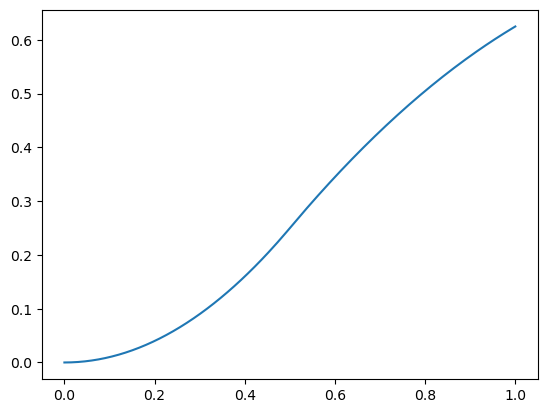

In [13]:
epsilon = 0
pho_min = 0 + epsilon
pho_max = 1 - epsilon
steps = 200
phos = np.linspace(pho_min,pho_max,steps,endpoint=True)
links = np.zeros(steps)
for i in range(steps):
    links[i] = link_function_per_block(phos[i])

plt.figure()
plt.plot(phos,links)
plt.show()

#### F potential per block

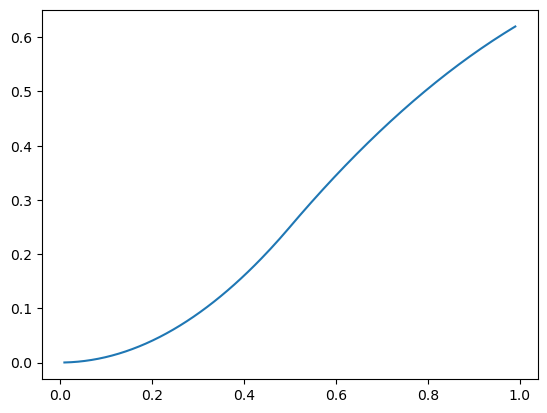

In [29]:
epsilon = 0.01
pho_min = 0 + epsilon
pho_max = 1 - epsilon
steps = 200
phos = np.linspace(pho_min,pho_max,steps,endpoint=True)
fs = np.zeros(steps)
for i in range(steps):
    fs[i] = thermodynamic_potential_F_per_block(phos[i])

plt.figure()
plt.plot(phos,fs)
plt.show()

#### Appendix Method

In [52]:
def function_to_maximize(pho, gamma, pho_2):
    if (pho_2 < 0 or pho_2 > 1):
        res = 0
    else:
        res = gamma*thermodynamic_potential_F_per_block(pho) + (1 - gamma)*thermodynamic_potential_F_per_block(pho_2)
    return res

def pho_2(pho, gamma):
    res = (pho_T - gamma*pho) / (1 - gamma)
    return res

phos_T = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
#phos_T = [0.5]

for k in range(len(phos_T)):
    pho_T = phos_T[k]
    
    # Data
    epsilon = 0.01

    pho_min = 0 + epsilon
    pho_max = 1 - epsilon
    
    proportion_min = 0
    proportion_max = 1

    steps = 500
    normalize = False

    phos = np.linspace(pho_min,pho_max,steps,endpoint=True)
    proportions = np.linspace(proportion_min, proportion_max, steps, endpoint=True)

    maxim = 0
    pho_max = 0
    proportion_max = 0

    for i in range(steps):
        for j in range(steps):
            b = pho_2(phos[i], proportions[j])
            a = function_to_maximize(phos[i], proportions[j], b)
            if a > maxim:
                maxim = a
                pho_max = phos[i]
                pho2_max = b
                proportion_max = proportions[j]
    
    print(f'pho_T =  {pho_T}')
    if maxim > thermodynamic_potential_F_per_block(pho_T):
        print(f'pho_1 = {pho_max}, pho_2 = {pho2_max}, gamma = {proportion_max}')
        print('segregated')
    else:
        print('homogeneous')
    print('')

C:\Users\Alan\AppData\Local\Temp\ipykernel_11224\3269391682.py:9: RuntimeWarning: divide by zero encountered in double_scalars
  res = (pho_T - gamma*pho) / (1 - gamma)


pho_T =  0.1
pho_1 = 0.9782164328657316, pho_2 = 2.4468580017173634e-05, gamma = 0.10220440881763526
segregated

pho_T =  0.2
pho_1 = 0.9880360721442887, pho_2 = 2.0996767404177358e-05, gamma = 0.20240480961923846
segregated

pho_T =  0.3
pho_1 = 0.9782164328657316, pho_2 = 9.50455824944548e-05, gamma = 0.3066132264529058
segregated

pho_T =  0.4
pho_1 = 0.9880360721442887, pho_2 = 5.6274164490657156e-05, gamma = 0.4048096192384769
segregated

pho_T =  0.5
pho_1 = 0.99, pho_2 = 8.097165991914504e-05, gamma = 0.5050100200400801
segregated

pho_T =  0.6
pho_1 = 0.9880360721442887, pho_2 = 0.00012790887898237865, gamma = 0.6072144288577154
segregated

pho_T =  0.7
pho_1 = 0.9782164328657316, pho_2 = 0.0005403765277032149, gamma = 0.7154308617234468
segregated

pho_T =  0.8
pho_1 = 0.9880360721442887, pho_2 = 0.0003518616179731615, gamma = 0.8096192384769538
segregated

pho_T =  0.9
pho_1 = 0.01, pho_2 = 0.9991091314031181, gamma = 0.1002004008016032
segregated



In [ ]:
x = np.array(densities)
y = np.array(densities)

# create grid in coordinates x, y
X, Y = np.meshgrid(x, y)

# create figure
fig, ax = plt.subplots(figsize=(12, 12))

for i in range(len(densities)):
    for j in range(len(densities)):
        text = "%.2f,%.2f" % (results[i,j,0] , results[i,j,1])
        if (np.min(results[i,j])/np.max(results[i,j])) <= 0.9:
            color = "red"
        else:
            color = "blue"
            
        square_size = 0.1
        cell = plt.Rectangle((X[i][j] - 0.05, Y[i][j] - 0.05), square_size, square_size, fill=True, color= color)
        ax.add_patch(cell)
        
        detail_square_size = 0.025
        cell_small = plt.Rectangle((X[i][j] + square_size/2 - detail_square_size, Y[i][j] - square_size/2), detail_square_size, detail_square_size, fill=True, color= 'white')
        ax.add_patch(cell_small)
        
        # teoretical result
        small_density = min(densities[i],densities[j])
        big_density = max(densities[i],densities[j])
        if(small_density == big_density):
            if(small_density < 0.5):
                color2 = "red"
            else:
                color2 = "blue"
        else:
            if(utility_function_per_block(big_density) < utility_function_per_block(small_density)):
                color2 = "blue"
            else:
                color2 = "red"
            
        small_square_size = 0.02
        cell_small = plt.Rectangle((X[i][j] + square_size/2 - small_square_size - detail_square_size/8, Y[i][j] - square_size/2 + detail_square_size/10), small_square_size, small_square_size, fill=True, color= color2)
        ax.add_patch(cell_small)
        
        
        ax.text(X[i][j], Y[i][j], text, va='center', ha='center', fontsize=9, color='white')

# Labels
ax.set_xlabel('Densities')
ax.set_ylabel('Densities')

# Graph limits
ax.set_xlim(x[0] - 0.15, np.max(x) + 0.15)
ax.set_ylim(y[0] - 0.15, np.max(y) + 0.15)

plt.show()

C:\Users\Alan\AppData\Local\Temp\ipykernel_11224\2957628425.py:11: RuntimeWarning: divide by zero encountered in double_scalars
  res = (pho_T - gamma*pho) / (1 - gamma)


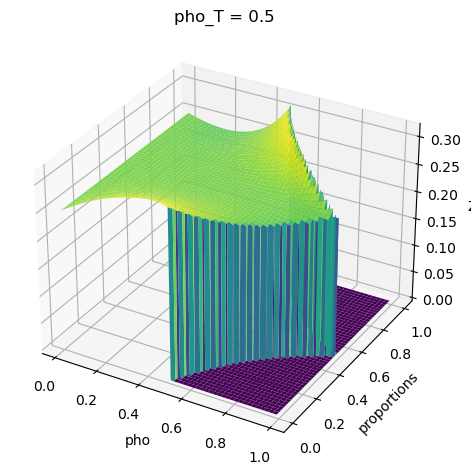

In [46]:
from mpl_toolkits.mplot3d import Axes3D

def function_to_maximize(pho, gamma, pho_2):
    if (pho_2 < 0 or pho_2 > 1):
        res = 0
    else:
        res = gamma*thermodynamic_potential_F_per_block(pho) + (1 - gamma)*thermodynamic_potential_F_per_block(pho_2)
    return res

def pho_2(pho, gamma):
    res = (pho_T - gamma*pho) / (1 - gamma)
    return res

        
fig = plt.figure()
#phos_T = [0.2, 0.4, 0.5, 0.6, 0.8]
phos_T = [0.5]

for k in range(len(phos_T)):
    pho_T = phos_T[k]
    
    # Data
    epsilon = 0.01

    pho_min = 0 + epsilon
    pho_max = 1 - epsilon
    
    proportion_min = 0
    proportion_max = 1

    steps = 500
    normalize = False

    phos = np.linspace(pho_min,pho_max,steps,endpoint=True)
    proportions = np.linspace(proportion_min, proportion_max, steps, endpoint=True)

    # Z values
    Z = np.zeros([steps,steps])

    for i in range(steps):
        for j in range(steps):
            Z[i,j] = function_to_maximize(phos[i], proportions[j], pho_2(phos[i], proportions[j]))

    # normalizing Z
    if normalize:
        for i in range(steps):
            Z_max = max(Z[i])
            Z_min = min(Z[i])
            for j in range(steps):
                Z[i,j] = (Z[i,j] - Z_min) / (Z_max - Z_min)

    # create grid
    phos, proportions = np.meshgrid(phos, proportions)

    # create 3d figure
    ax = fig.add_subplot(int(str(1) + str(len(phos_T)) + str(k+1)), projection='3d')

    # create graph
    surface = ax.plot_surface(phos, proportions, Z, cmap='viridis')

    # labels
    ax.set_title(f'pho_T = {pho_T}')
    ax.set_xlabel('pho')
    ax.set_ylabel('proportions')
    ax.set_zlabel('Z')
    
    
plt.tight_layout()
plt.show()

#### System with two blocks

##### Graphs of F as a function of pho_1 (density of block 1)

alpha = 0.00
p_0 = 0.10, p_1_max = 0.001
p_0 = 0.15, p_1_max = 0.001
p_0 = 0.20, p_1_max = 0.001
p_0 = 0.25, p_1_max = 0.001
p_0 = 0.30, p_1_max = 0.001
p_0 = 0.35, p_1_max = 0.001
p_0 = 0.40, p_1_max = 0.001
p_0 = 0.45, p_1_max = 0.001
p_0 = 0.50, p_1_max = 0.001
p_0 = 0.55, p_1_max = 0.10100000000000009
p_0 = 0.60, p_1_max = 0.5979949748743718
p_0 = 0.65, p_1_max = 0.648246231155779
p_0 = 0.70, p_1_max = 0.698497487437186
p_0 = 0.75, p_1_max = 0.7487487437185929
p_0 = 0.80, p_1_max = 0.799
p_0 = 0.85, p_1_max = 0.849251256281407
p_0 = 0.90, p_1_max = 0.8995025125628141


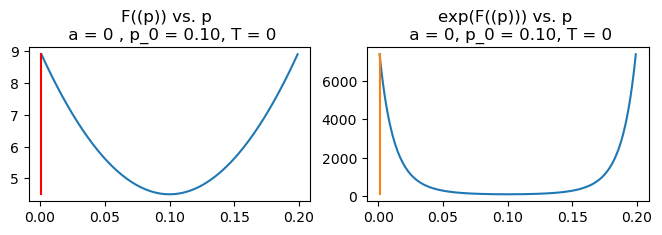

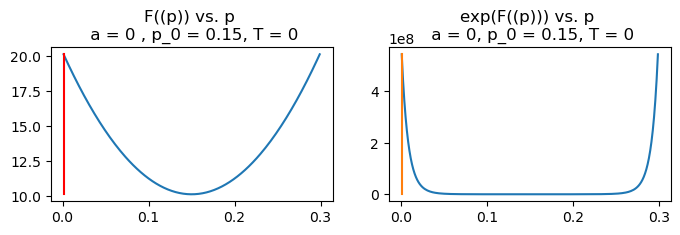

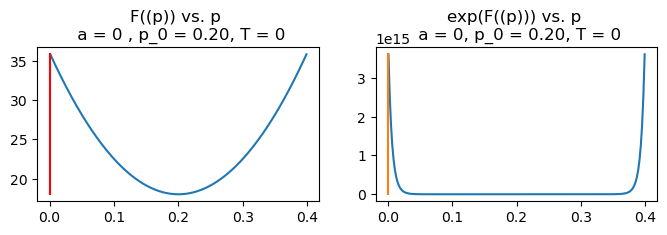

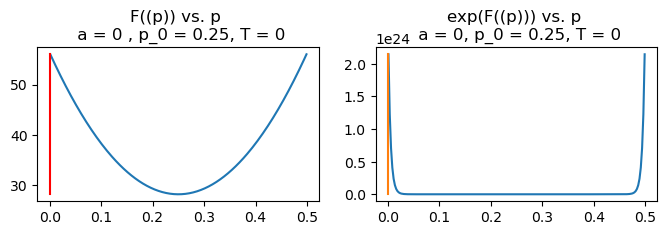

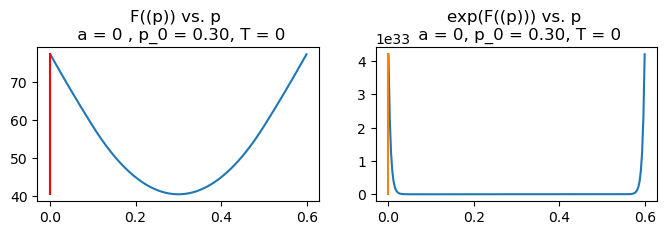

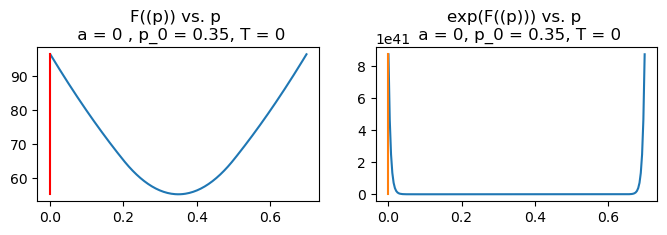

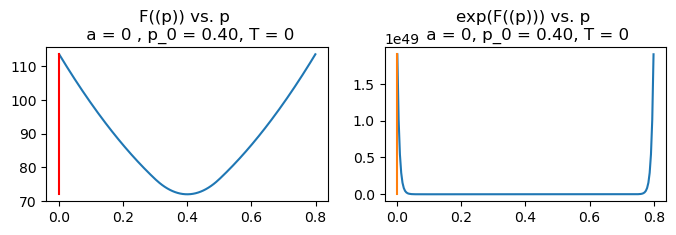

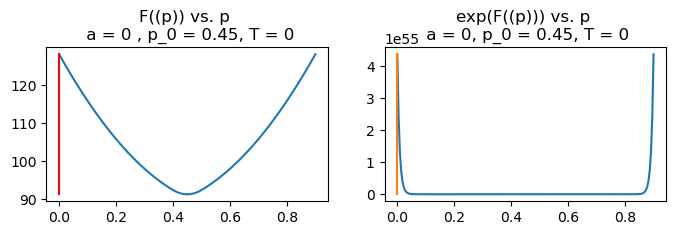

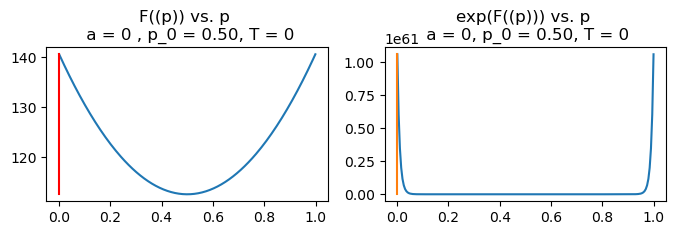

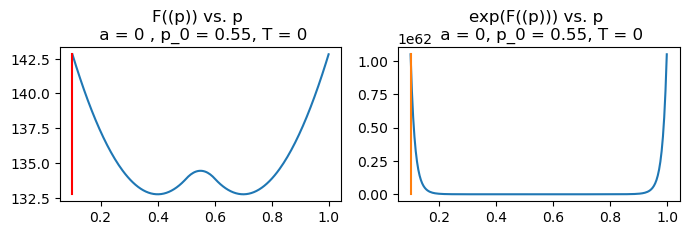

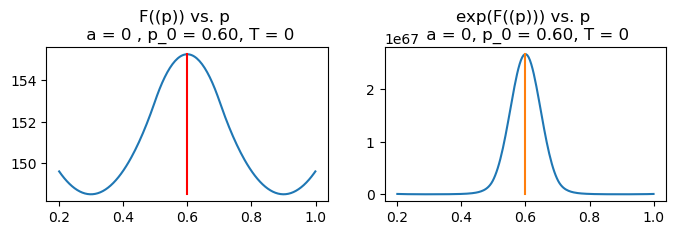

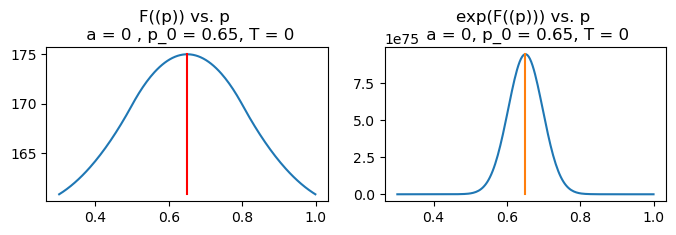

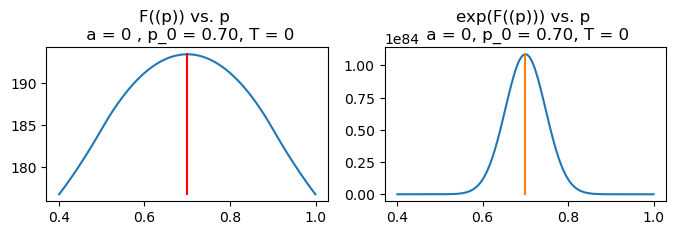

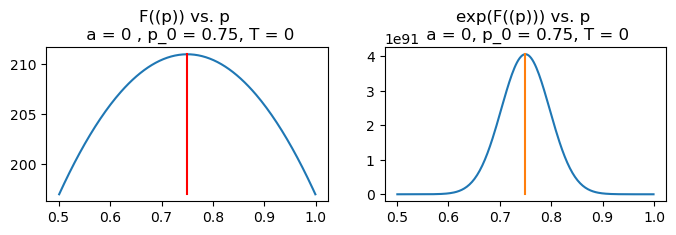

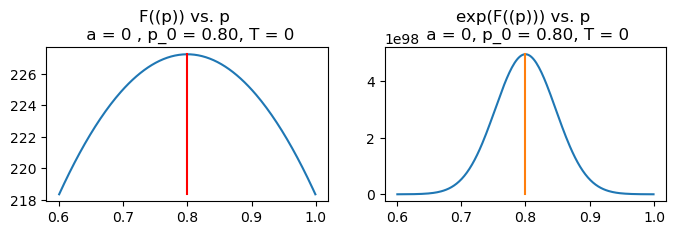

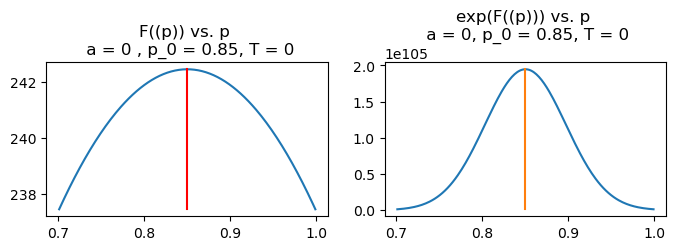

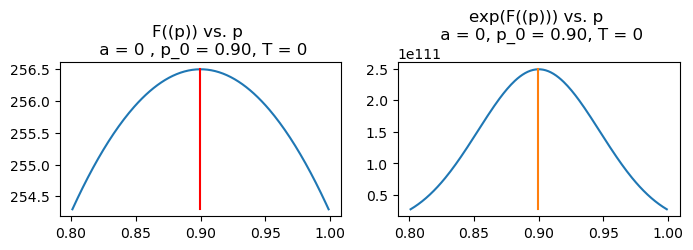

In [63]:
pho_Ts = np.linspace(0.1,0.9,17,endpoint=True)
epsilon = 0.001

print(f"alpha = {alpha:.2f}")

for k in range(len(pho_Ts)):
    pho_T = pho_Ts[k]
    if pho_T >= 0.5:
        pho_min = 2*pho_T - 1 + epsilon
        pho_max = 1 - epsilon
    else:
        pho_min = 0 + epsilon
        pho_max = 2*pho_T - epsilon

    steps = 200
    phos = np.linspace(pho_min,pho_max,steps,endpoint=True)
    pho_array = np.zeros([steps,2])
    for i in range(steps):
        pho = phos[i]
        pho_2 = 2 * (pho_T - pho/2)
        pho_array[i] = [pho,pho_2]

    potential_Fs = np.zeros(steps)

    max_F = 0
    i_max = 0

    for i in range(steps):
        potential_Fs[i] = thermodynamic_potential_F(pho_array[i])
        if(potential_Fs[i] > max_F):
            max_F = potential_Fs[i]
            i_max = i

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 2))

    ax1.plot(phos,potential_Fs)
    ax1.plot([phos[i_max],phos[i_max]], [np.min(potential_Fs),potential_Fs[i_max]], color = 'r')
    ax1.set_title(f"F((p)) vs. p \n a = {alpha} , p_0 = {pho_T:.2f}, T = {T}")

    ax2.plot(phos, np.exp(potential_Fs))
    ax2.plot([phos[i_max],phos[i_max]], [min(np.exp(potential_Fs)),np.exp(potential_Fs[i_max])])
    ax2.set_title(f"exp(F((p))) vs. p \n a = {alpha}, p_0 = {pho_T:.2f}, T = {T}")
    print(f'p_0 = {pho_T:.2f}, p_1_max = {phos[i_max]}')

plt.show()

##### Graphs of segregation (red) or homogeneity (blue) of a system as a function of pho_total and alpha

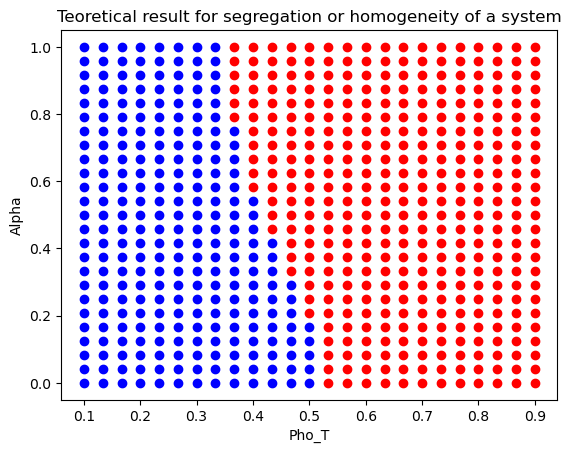

In [21]:
values = 25
pho_Ts = np.linspace(0.1,0.9,values,endpoint=True)
alphas = np.linspace(0, 1, values, endpoint=True)
epsilon = 0.001

plt.figure()

for a in range(len(alphas)):
    alpha = alphas[a]
    phos_of_max_F = np.zeros(len(pho_Ts))
    
    for k in range(len(pho_Ts)):
        pho_T = pho_Ts[k]
        if pho_T >= 0.5:
            pho_min = 2*pho_T - 1 + epsilon
            pho_max = 1 - epsilon
        else:
            pho_min = 0 + epsilon
            pho_max = 2*pho_T - epsilon

        steps = 200
        phos = np.linspace(pho_min,pho_max,steps,endpoint=True)
        pho_array = np.zeros([steps,2])
        for i in range(steps):
            pho = phos[i]
            pho_2 = 2 * (pho_T - pho/2)
            pho_array[i] = [pho,pho_2]

        potential_Fs = np.zeros(steps)

        max_F = 0
        i_max = 0

        for i in range(steps):
            potential_Fs[i] = thermodynamic_potential_F(pho_array[i])
            if(potential_Fs[i] > max_F):
                max_F = potential_Fs[i]
                i_max = i
        
        phos_of_max_F[k] = phos[i_max]
    
        if(phos_of_max_F[k] <= 0.01):
            color = 'blue'
        else:
            color = 'red'
            
        plt.scatter(pho_T, alpha, color = color)
        
    """
    plt.figure()
    plt.plot(pho_Ts, phos_of_max_F)
    plt.xlabel("Pho_Total values")
    plt.ylabel("Pho values that  maximize the F function")
    plt.show()
    """
plt.xlabel('Pho_T')
plt.ylabel('Alpha')
plt.title('Teoretical result for segregation or homogeneity of a system')
plt.show()

##### Graphs of exp(F) as a function of pho_1 (density of block 1) and alpha

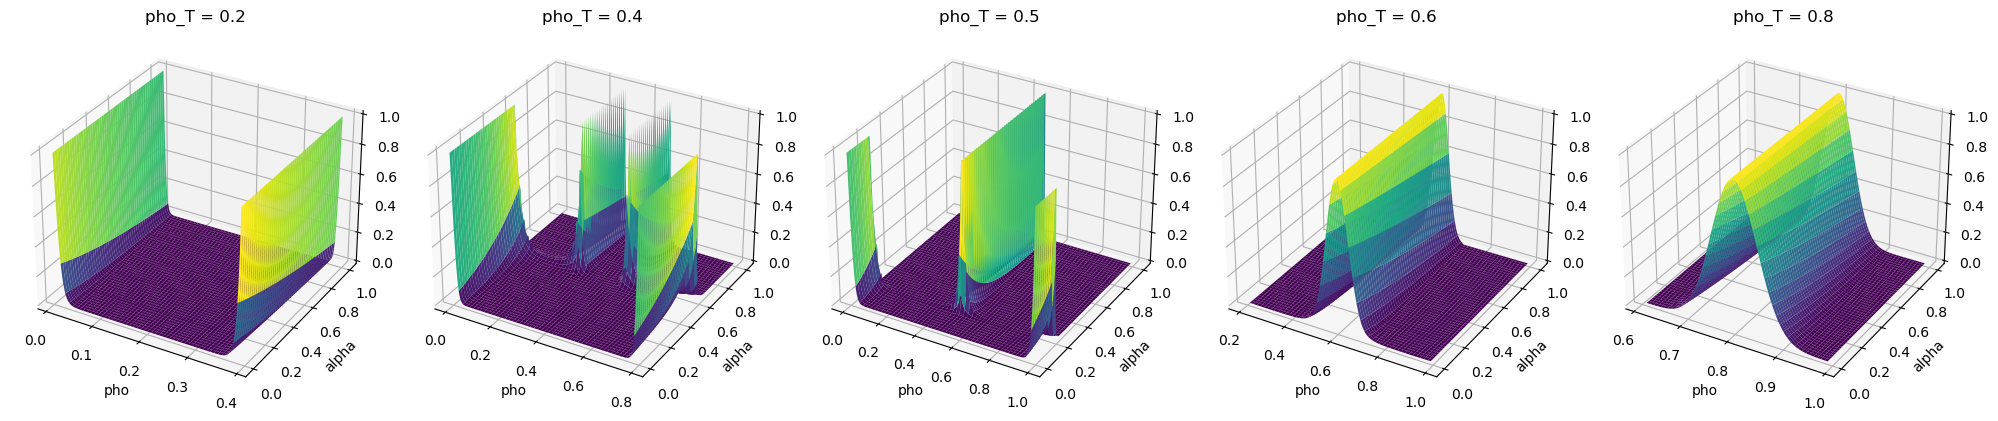

In [100]:
from mpl_toolkits.mplot3d import Axes3D

def thermodynamic_potential_F_per_block_THISCELL(pho, alpha):
    res = -T*pho*np.log(pho) - T*(1-pho)*np.log((1-pho)) + alpha*pho*utility_function_per_block(pho) + (1-alpha)*link_function_per_block(pho)
    return res

def thermodynamic_potential_F_THISCELL(pho_array, alpha):
    summation = 0
    for pho in pho_array:
        summation += thermodynamic_potential_F_per_block_THISCELL(pho, alpha)
    summation *= H
    return summation

fig = plt.figure(figsize=(20, 4))
phos_T = [0.2, 0.4, 0.5, 0.6, 0.8]

for k in range(len(phos_T)):
    pho_T = phos_T[k]
    
    # Data
    epsilon = 0.01

    if pho_T >= 0.5:
        pho_min = 2*pho_T - 1 + epsilon
        pho_max = 1 - epsilon
    else:
        pho_min = 0 + epsilon
        pho_max = 2*pho_T - epsilon

    alpha_min = 0
    alpha_max = 1

    steps = 200

    normalize = True

    phos = np.linspace(pho_min,pho_max,steps,endpoint=True)
    alphas = np.linspace(alpha_min,alpha_max,steps,endpoint=True)

    pho_array = np.zeros([steps,2])
    for i in range(steps):
        pho = phos[i]
        pho_2 = 2 * (pho_T - pho/2)
        pho_array[i] = [pho,pho_2]

    # Z values
    Z = np.zeros([steps,steps])

    for i in range(steps):
        for j in range(steps):
            Z[i,j] = thermodynamic_potential_F_THISCELL(pho_array[j], alphas[i])
            Z[i,j] = np.exp(Z[i,j])

    # normalizing Z
    if normalize:
        for i in range(steps):
            Z_max = max(Z[i])
            Z_min = min(Z[i])
            for j in range(steps):
                Z[i,j] = (Z[i,j] - Z_min) / (Z_max - Z_min)

    # create grid
    phos, alphas = np.meshgrid(phos, alphas)

    # create 3d figure
    ax = fig.add_subplot(int(str(1) + str(len(phos_T)) + str(k+1)), projection='3d')

    # create graph
    surface = ax.plot_surface(phos, alphas, Z, cmap='viridis')

    # labels
    ax.set_title(f'pho_T = {pho_T}')
    ax.set_xlabel('pho')
    ax.set_ylabel('alpha')
    ax.set_zlabel('Z')
    
    
plt.tight_layout()
plt.show()

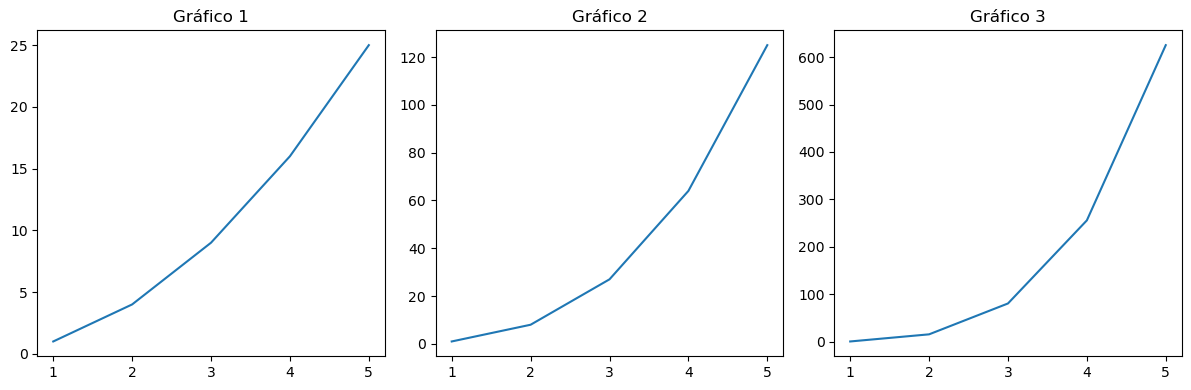

In [184]:
# Crie alguns dados de exemplo para os gráficos
x = [1, 2, 3, 4, 5]
y1 = [1, 4, 9, 16, 25]
y2 = [1, 8, 27, 64, 125]
y3 = [1, 16, 81, 256, 625]

# Crie a primeira figura e o primeiro subplot
plt.figure(figsize=(16, 4))  # Tamanho da figura
plt.subplot(141)  # Subplot 1 de 3

# Plote o primeiro gráfico
plt.plot(x, y1)
plt.title('Gráfico 1')

# Crie o segundo subplot
plt.subplot(142)  # Subplot 2 de 3

# Plote o segundo gráfico
plt.plot(x, y2)
plt.title('Gráfico 2')

# Crie o terceiro subplot
plt.subplot(143)  # Subplot 3 de 3

# Plote o terceiro gráfico
plt.plot(x, y3)
plt.title('Gráfico 3')

# Ajuste o layout para evitar sobreposições
plt.tight_layout()

# Exiba os gráficos
plt.show()


#### System with Q blocks

In [ ]:
pho_Ts = np.linspace(0.1,0.9,17,endpoint=True)
epsilon = 0.001

for k in range(len(pho_Ts)):
    pho_T = pho_Ts[k]
    if pho_T >= 0.5:
        pho_min = 2*pho_T - 1 + epsilon
        pho_max = 1 - epsilon
    else:
        pho_min = 0 + epsilon
        pho_max = 2*pho_T - epsilon

    steps = 200
    phos = np.linspace(pho_min,pho_max,steps,endpoint=True)
    pho_array = np.zeros([steps,2])
    for i in range(steps):
        pho = phos[i]
        pho_2 = 2 * (pho_T - pho/2)
        pho_array[i] = [pho,pho_2]

    potential_Fs = np.zeros(steps)

    max_F = 0
    i_max = 0

    for i in range(steps):
        potential_Fs[i] = thermodynamic_potential_F(pho_array[i])
        if(potential_Fs[i] > max_F):
            max_F = potential_Fs[i]
            i_max = i

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

    ax1.plot(phos,potential_Fs)
    ax1.plot([phos[i_max],phos[i_max]], [np.min(potential_Fs),potential_Fs[i_max]], color = 'r')
    ax1.set_title(f"F((p)) vs. p \n a = {alpha} , p_0 = {pho_T:.2f}, T = {T}")

    ax2.plot(phos, np.exp(potential_Fs))
    ax2.plot([phos[i_max],phos[i_max]], [min(np.exp(potential_Fs)),np.exp(potential_Fs[i_max])])
    ax2.set_title(f"exp(F((p))) vs. p \n a = {alpha}, p_0 = {pho_T:.2f}, T = {T}")

plt.show()